### Description

> This project uses two datasets: train and test, both containing images of 40 individuals. Each dataset has been preprocessed for this project, and each dataset has dimensionality 200x10304.

### Importing Libraries

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

### Reading Training Data & Test Data

- Also removing the last column of Training Data and assigning it to one variable, doing the same thing for Test Data.

In [ ]:
# reading the data
train_data = pd.read_csv('TrainData.csv')
test_data = pd.read_csv('TestData.csv')

# storing the labels separately
train_label = train_data.iloc[:,-1]
test_label = test_data.iloc[:,-1]

# removing the last column from the data itself
train_X = train_data.iloc[:,:-1]
test_X = test_data.iloc[:,:-1]

# converting to numpy
train = train_X.to_numpy()
test = test_X.to_numpy()

In [ ]:
print(train.shape)
print(test.shape)

(200, 10304)
(200, 10304)


In [ ]:
print(train_label.shape)
print(test_label.shape)

(200,)
(200,)


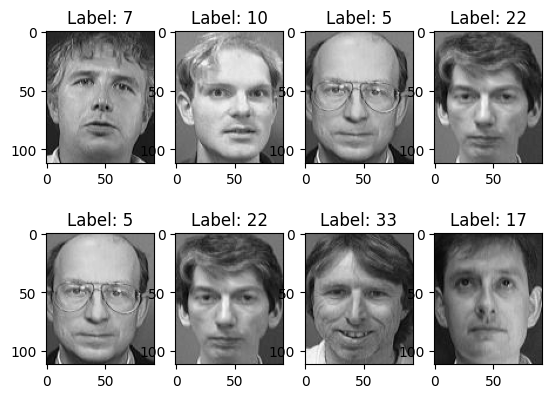

In [ ]:
# testing to make sure the data was read correctly
    # printing out 8 images w/ labels
fig, axes = plt.subplots(2, 4)
indices = np.random.choice(200, 8)  # we have 200 samples, we want to randomly choose 8 of these samples
for i, ax in enumerate(axes.flat):
    idx = indices[i]
    x = train[idx,:]
    label = train_label[idx]
    image = x.reshape((112,92))  # 10,304 is a multiplication of 112x92
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')

### Distance Function

In [ ]:
# function to calculate distance between two points
def dis(x1, x2):
    return np.linalg.norm(x1 - x2)

### Classifier Function

In [ ]:
# function to perform classification
def myclassifier(Train, Trainlabel, Test):
    " Train is the training data. "
    " Trainlabel is the training labels. "
    " Test is the testing data. "

    pred = []

    for testpoint in Test:
        pred_dis = []
        for trainpoint in Train:
            pred_dis.append(dis(testpoint, trainpoint))
        pred.append(Trainlabel[np.argmin(pred_dis)])

    return np.array(pred)

### Accuracy Function

- Used to calculate the accuracy--you can use this function to get the accuracy of PCA and KPCA.

In [ ]:
def calculate_accuracy(true_labels, predicted_labels):

    # ensure that the true labels and predicted labels have the same length
    if len(true_labels) != len(predicted_labels):
        raise ValueError("Length of true_labels and predicted_labels must be the same.")

    # count the number of correct predictions
    correct_predictions = sum(1 for true, predicted in zip(true_labels, predicted_labels) if true == predicted)

    # calculate accuracy as the ratio of correct predictions to total predictions
    accuracy = correct_predictions / len(true_labels)

    return accuracy

# Principal Component Analysis (PCA) w/ Testing & Evaluation

## my_pca Implementation

In [ ]:
def my_pca(D, alpha):
    """
    Principal Component Analysis (PCA) Function

    PARAMETERS:
    - D: input data as an ndarray of shape (n_samples, n_features)
    - alpha: percentage of the variance to retain (0-1, should be a decimal [e.g., 0.95])

    SIDE NOTE:
    The following from the template code is no longer a parameter and is rather one of the returned items.
    - k: number of principal components
    This is because, in my version of my_pca, I manually find the optimal value for k that retains the most data within the function.

    RETURNS:
    - Transformed data in the PCA space.
    - Reduced Eigen Vectors.
    - Mean.
    - k, the number of principle components.
    """

    # 1) centering the data
    mean1 = np.mean(D, axis=0)
    D1 = D - mean1


    # 2) computing the covariance matrix
    cov = np.cov(D1, rowvar=False, bias=True)


    # 3) finding the eign values and eign vectors
    eigen_values, eigen_vectors = np.linalg.eig(cov)


    # 4) sorting the eigen values and eigen vectors (descending order)
    idx = np.argsort(eigen_values)[::-1]  # argsort goes smallest-largest, so [::-1] makes it largest-smallest
    eigen_values = eigen_values[idx]  # sorts the eigen values
    eigen_vectors = eigen_vectors[:,idx]  # sorts the eigen vectors


    # EXTRA STEP) finding an optimal k value that retains a significant amount of variance
    var_ratio = eigen_values / np.sum(eigen_values)  # array that stores the var ratio for each eigen_value
    cumulative_var_ratio = np.cumsum(var_ratio)  # array that stores a cumulative sum, adding the var ratio of each next PC every time
        # finding the smallest k that satisfies the target variance
    k = np.argmax(cumulative_var_ratio >= alpha) + 1  # adding 1 since indexing starts at 0
    reduced_eigen_vectors = eigen_vectors[:,:k]  # we only need principle components, not the entire eign vector, so we reduce it


    # 5) projecting
    projected_data = np.dot(D1, reduced_eigen_vectors)


    return projected_data, reduced_eigen_vectors, mean1, k

### my_pca

In [ ]:
projected_train_pca, reduced_eign_vectors, mean1, k = my_pca(train, alpha=0.95)

print("PCA with my_pca (Train): \n")
print(projected_train_pca)
print(projected_train_pca.shape)
print("# of Principal Components Used: ", k)

PCA with my_pca (Train): 

[[-1362.40471908+0.j -1410.01500067+0.j  1786.8754089 +0.j ...
   -150.11133985+0.j  -104.67869886+0.j  -227.85254569+0.j]
 [-2903.70161117+0.j -1135.07676178+0.j  -313.628798  +0.j ...
    -28.35171053+0.j  -245.51096308+0.j   -56.21974735+0.j]
 [-2572.25743345+0.j  -808.30460733+0.j   795.65905864+0.j ...
     81.35025913+0.j   337.77601404+0.j  -150.22696891+0.j]
 ...
 [ 1292.41733442+0.j  -826.52299566+0.j  -421.53541979+0.j ...
    -90.70276079+0.j    32.43882049+0.j    37.63505263+0.j]
 [ 1096.66971391+0.j -1351.82682683+0.j  -257.26877143+0.j ...
    129.08823955+0.j   142.0174865 +0.j   -30.07607103+0.j]
 [ 1425.95118228+0.j -1602.35752062+0.j  -185.81817133+0.j ...
    -33.17066351+0.j     9.99205292+0.j   144.11871477+0.j]]
(200, 110)
# of Principal Components Used:  110


In [ ]:
# now dealing with the test data
test_centered = test - mean1  # to center the test data, we have to center it by using the mean of the training data, NOT the mean of the test data
projected_test_pca = np.dot(test_centered, reduced_eign_vectors)

print("PCA with my_pca (Test): \n")
print(projected_test_pca)
print(projected_test_pca.shape)
print("# of Principal Components Used: ", k)

PCA with my_pca (Test): 

[[-2.48054691e+03+0.j -1.39744552e+03+0.j  1.23542193e+03+0.j ...
   1.63138363e+02+0.j  2.02337191e+01+0.j -4.24841900e+01+0.j]
 [-2.39651250e+03+0.j -1.31834404e+03+0.j  3.36459306e+02+0.j ...
  -5.21802498e+01+0.j -8.81501667e+01+0.j  1.17200237e+02+0.j]
 [-2.22994470e+03+0.j -1.03077071e+03+0.j  1.22494652e+03+0.j ...
   1.28193027e+02+0.j  7.40352151e+01+0.j  2.72024225e+00+0.j]
 ...
 [ 1.08414502e+03+0.j -1.03939679e+03+0.j -1.11498511e+03+0.j ...
   2.14723039e+01+0.j  1.33842235e+02+0.j  2.69477620e+01+0.j]
 [ 1.01033364e+03+0.j -1.65916589e+03+0.j -6.11825181e+02+0.j ...
  -1.20076870e+00+0.j  1.09726085e+02+0.j  4.48360110e+01+0.j]
 [ 1.54343017e+03+0.j -1.68911271e+03+0.j -3.66679822e+02+0.j ...
   2.37394644e+01+0.j -8.06817135e+01+0.j -5.65078360e+01+0.j]]
(200, 110)
# of Principal Components Used:  110


In [ ]:
# applying minimum distance classifier to classify the test dataset
predicted_label = myclassifier(projected_train_pca, train_label, projected_test_pca)
accuracy = calculate_accuracy(test_label, predicted_label)
# evaluating the classification performance on the test dataset using accuracy metrics
print(accuracy*100)

88.5


In [ ]:
# creating a PCA object with the desired number of components
n_components = k
pca = PCA(n_components=n_components)

# fitting and transforming the data using scikit-learn
projected_train_pca_sklearn = pca.fit_transform(train)  # this centers, computes eign vector... all of the steps we did before, in one simple line

print("PCA with Scikit-Learn (Train): \n")
print(projected_train_pca_sklearn)
print(projected_train_pca_sklearn.shape)
print("# of Principle Components Used: ", k)

PCA with Scikit-Learn (Train): 

[[ 1362.40471908 -1410.01500066 -1786.87540905 ...     8.90976847
    151.12177596  -252.55629007]
 [ 2903.70161117 -1135.0767618    313.62879834 ...  -119.29161191
     -4.7511011   -161.81631355]
 [ 2572.25743345  -808.30460732  -795.65905879 ...   -35.28546831
   -140.86538145   102.68904634]
 ...
 [-1292.41733442  -826.52299568   421.53541981 ...   154.30922628
    -14.38931178   -18.6713913 ]
 [-1096.66971392 -1351.82682681   257.26877156 ...  -104.84431629
    -93.75926853   106.7044692 ]
 [-1425.95118229 -1602.35752061   185.81817109 ...   -21.658877
    306.29310052   160.31841089]]
(200, 110)
# of Principle Components Used:  110


In [ ]:
# applying the same PCA transformation to the test data
projected_test_pca_sklearn = pca.transform(test)

print("PCA with Scikit-Learn (Test): \n")
print(projected_test_pca_sklearn)
print(projected_test_pca_sklearn.shape)
print("# of Principle Components Used: ", k)

PCA with Scikit-Learn (Test): 

[[ 2480.54691359 -1397.44552022 -1235.42192698 ...   -91.16895267
    -88.50157672    30.54337322]
 [ 2396.51250251 -1318.34404203  -336.45930577 ...   -11.45660324
    133.61253014    14.18195622]
 [ 2229.94469868 -1030.77071003 -1224.94651817 ...   -73.65706295
    -52.45517001   120.7969554 ]
 ...
 [-1084.14501801 -1039.39679434  1114.98510725 ...    54.84608679
    -74.46273962   144.45867245]
 [-1010.33363885 -1659.16588863   611.8251811  ...    31.61990803
    -29.46170286   125.40747969]
 [-1543.43017469 -1689.11271354   366.67982203 ...   -30.69392979
    -78.96834674   -60.30408779]]
(200, 110)
# of Principle Components Used:  110


In [ ]:
# applying minimum distance classifier to classify the test dataset
predicted_label = myclassifier(projected_train_pca_sklearn, train_label, projected_test_pca_sklearn)
accuracy = calculate_accuracy(test_label, predicted_label)
# evaluating the classification performance on the test dataset using accuracy metrics
print(accuracy*100)

89.0


###  Plot w/ Sklearn

**This is an alternative way to find a good k value that results in good accuracy with the classifer. This method was shown in class.**

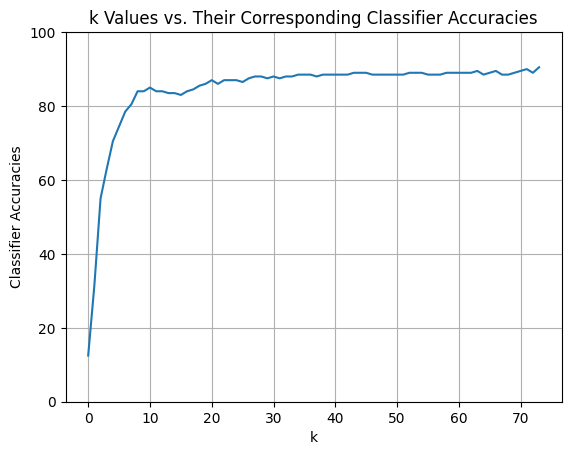

In [ ]:
# finding the classifier accuracy for each k value between 1 and 75
accuracies = []
for k in range(1, 75):
  pca_extra = PCA(n_components = k)
  pca_extra.fit(train)
  reduced_train = pca_extra.transform(train)  # I could have used fit_transform on the train set to do everything in one line of code, but I broke it up the code, like how the professor showed in class
  reduced_test = pca_extra.transform(test)
  pred = myclassifier(reduced_train, train_label, reduced_test)
  accuracy = calculate_accuracy(test_label, pred)
  accuracies.append(accuracy*100)

# plotting the k values against their corresponding accuracy values
accuracies = np.array(accuracies)  # converting to np
plt.plot(accuracies)
plt.ylim([0,100])  # setting a limit for the values of the y axis, since we are working with percent values on that axis
plt.xlabel('k')
plt.ylabel('Classifier Accuracies')
plt.title('k Values vs. Their Corresponding Classifier Accuracies')
plt.grid()
plt.show()

As can be seen by the above graph, when k is greater than 30, we start to see the classifier accuracy converging to around 88%. This means that, as long as the k value picked is greater than 30, we will receive an optimal accuracy for this case with PCA.

#  Kernel PCA (KPCA) w/ Testing & Evaluation

## my_kpca Implementation

In [2]:
def rbf_kernel(x, y, gamma=1.0):
    """ Radial Basis Function (RBF) Kernel """
    # 1/2sigma^2 is labeled as gamma here
        # this is the gaussian kernel formula from my lecture notes
    return np.exp(-gamma * np.linalg.norm(x - y) ** 2)


def poly_kernel(x, y, degree=3):
    """ Polynomial Kernel """
    return np.dot(x, y) ** degree


def linear_kernel(x, y):
    """ Linear Kernel """
    return np.dot(x, y)

In [ ]:
 I created this function to do the computations of the kernel matrix
  # in the simpler examples from the professor, this code was typically just included in my_kpca
  # however, since this code is larger in my implementation since I had to make several if/else cases...
  # ...I included this code here for better readability for my_kpca
def compute_kernel_matrix(data, kernel_type, kernel_param):
    """
    Compute Kernel Matrix Function

    PARAMETERS:
    - data: input data as an ndarray of shape (n_samples, n_features)
    - kernel_type: type of kernel ('rbf', 'poly', or 'linear')
    - kernel_param: kernel parameter (e.g., gamma for RBF, degree for polynomial)

    RETURNS:
    - Kernel matrix.
    - n_samples, the number of samples in the input data (in this case, 200).
    """#

    n_samples = data.shape[0]
    kernel_matrix = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            if (kernel_type=='rbf'):
                kernel_matrix[i, j] = rbf_kernel(data[i], data[j], kernel_param)
            elif (kernel_type=='poly'):
                kernel_matrix[i, j] = poly_kernel(data[i], data[j], kernel_param)
            elif (kernel_type=='linear'):
                kernel_matrix[i, j] = linear_kernel(data[i], data[j])

    return kernel_matrix, n_samples

In [ ]:
def my_kpca(data, alpha, kernel_type='rbf', kernel_param=1.0):
    """
    Kernel Principal Component Analysis (KPCA) Function

    PARAMETERS:
    - data: input data as an ndarray of shape (n_samples, n_features)
    - alpha: percentage of the variance to retain (0-1, should be a decimal [e.g., 0.95])
    - kernel_type: type of kernel ('rbf', 'poly', or 'linear')
    - kernel_param: kernel parameter (e.g., gamma for RBF, degree for polynomial)

    SIDE NOTE:
    The following from the template code is no longer a parameter and is rather one of the returned items.
    - n_components: number of principal components
    This is because, in my version of my_kpca, I manually find the optimal value for n_components that retains the most data within the function.

    RETURNS:
    - Transformed data in the PCA space.
    - Reduced Eigen Vectors.
    - Mean.
    - k, the number of principle components.
    """


    # 1) computing the kernel matrix
    kernel_matrix, n_samples = compute_kernel_matrix(data, kernel_type, kernel_param)


    # 2) centering the kernel matrix
    one_n = np.ones((n_samples, n_samples)) / n_samples
    # split up for debugging
    mean2_1 = one_n.dot(kernel_matrix)
    mean2_2 = kernel_matrix.dot(one_n)
    mean2_3 = one_n.dot(kernel_matrix).dot(one_n)
    # combining
    mean2 = -(mean2_1) - (mean2_2) + (mean2_3)
    # centering
    centered_kernel_matrix = kernel_matrix + mean2


    # 3) finding the eigen values and eigen vectors
    eigen_values, eigen_vectors = np.linalg.eig(centered_kernel_matrix)


    # 4) sorting the eigen values and eigen vectors (descending order)
    idx = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[idx]
    eigen_vectors = eigen_vectors[:, idx]


    # EXTRA STEP) finding an optimal n_components value that retains a significant amount of variance
    var_ratio = eigen_values / np.sum(eigen_values)  # array that stores the var ratio for each eigen_value
    cumulative_var_ratio = np.cumsum(var_ratio)  # array that stores a cumulative sum, adding the var ratio of each next PC every time
        # finding the smallest k that satisfies the target variance
    k = np.argmax(cumulative_var_ratio >= alpha) + 1  # adding 1 since indexing starts at 0
    reduced_eigen_vectors = eigen_vectors[:,:k]  # we only need principle components, not the entire eigen vector, so we reduce it


    # 5) projecting the data onto the selected components (n_components)
    projected_data = np.dot(centered_kernel_matrix, reduced_eigen_vectors)


    return projected_data, reduced_eigen_vectors, mean2, k

### my_kpca (RBF)

In [ ]:
projected_train_kpca, reduced_eigen_vectors, mean2, k = my_kpca(train, alpha=0.95, kernel_type='rbf', kernel_param=0.5)

print("KPCA with my_kpca (Train, RBF Kernel): \n")
print(projected_train_kpca)
print(projected_train_kpca.shape)
print("# of Principal Components Used: ", k)

KPCA with my_kpca (Train, RBF Kernel): 

[[-5.82341258e-03+0.j -2.37294143e-03+0.j  3.41662868e-03+0.j ...
  -5.31879082e-03+0.j  3.73763788e-03+0.j  1.70834549e-04+0.j]
 [ 1.44817062e-03+0.j -4.39110283e-03+0.j  1.10234182e-02+0.j ...
   4.32628509e-02+0.j  2.91309399e-02+0.j  3.75281471e-02+0.j]
 [-6.02328153e-02+0.j  2.76941572e-03+0.j  9.83302380e-03+0.j ...
   1.94417723e-01+0.j -7.83723097e-02+0.j  6.15600627e-02+0.j]
 ...
 [ 2.28241207e-02+0.j -1.31040261e-01+0.j  1.23930858e-01+0.j ...
  -6.40020915e-04+0.j -1.02140161e-02+0.j  1.18606001e-01+0.j]
 [-3.95493540e-03+0.j -5.34340172e-02+0.j  2.32139453e-02+0.j ...
   3.15271364e-02+0.j -4.62050623e-02+0.j -2.32545369e-02+0.j]
 [ 3.55734057e-02+0.j -4.12090259e-02+0.j -1.18761288e-02+0.j ...
   5.78067943e-03+0.j -1.98602780e-02+0.j -5.69935394e-02+0.j]]
(200, 190)
# of Principal Components Used:  190


In [ ]:
# now dealing with the test data
kernel_matrix, n_samples = compute_kernel_matrix(test, kernel_type='rbf', kernel_param=1.0)
centered_kernel_matrix = kernel_matrix + mean2
#projecting
projected_test_kpca = np.dot(centered_kernel_matrix, reduced_eigen_vectors)

print("KPCA with my_kpca (Test, RBF Kernel): \n")
print(projected_test_kpca)
print(projected_test_kpca.shape)
print("# of Principal Components Used: ", k)

KPCA with my_kpca (Test, RBF Kernel): 

[[-5.82341258e-03+0.j -2.37294143e-03+0.j  3.41662868e-03+0.j ...
  -5.31879082e-03+0.j  3.73763788e-03+0.j  1.70834549e-04+0.j]
 [ 1.44817062e-03+0.j -4.39110283e-03+0.j  1.10234182e-02+0.j ...
   4.32628509e-02+0.j  2.91309399e-02+0.j  3.75281471e-02+0.j]
 [-6.02328153e-02+0.j  2.76941572e-03+0.j  9.83302380e-03+0.j ...
   1.94417723e-01+0.j -7.83723097e-02+0.j  6.15600627e-02+0.j]
 ...
 [ 2.28241207e-02+0.j -1.31040261e-01+0.j  1.23930858e-01+0.j ...
  -6.40020915e-04+0.j -1.02140161e-02+0.j  1.18606001e-01+0.j]
 [-3.95493540e-03+0.j -5.34340172e-02+0.j  2.32139453e-02+0.j ...
   3.15271364e-02+0.j -4.62050623e-02+0.j -2.32545369e-02+0.j]
 [ 3.55734057e-02+0.j -4.12090259e-02+0.j -1.18761288e-02+0.j ...
   5.78067943e-03+0.j -1.98602780e-02+0.j -5.69935394e-02+0.j]]
(200, 190)
# of Principal Components Used:  190


In [ ]:
# applying minimum distance classifier to classify the test dataset
predicted_label = myclassifier(projected_train_kpca, train_label, projected_test_kpca)
accuracy = calculate_accuracy(test_label, predicted_label)
# evaluating the classification performance on the test dataset using accuracy metrics
print(accuracy*100)

100.0


### Sklearn (RBF)

In [ ]:
# creating a Kernel PCA object with the desired kernel and number of components
kpca_rbf = KernelPCA(kernel='rbf', gamma=1.0, n_components=k)

# fitting and transforming the data using scikit-learn
projected_train_kpca = kpca_rbf.fit_transform(train)

print("KPCA with Scikit-Learn (Train, RBF Kernel): \n")
print(projected_train_kpca)
print(projected_train_kpca.shape)
print("# of Principal Components Used: ", k)

KPCA with Scikit-Learn (Train, RBF Kernel): 

[[-0.         -0.         -0.         ... -0.          0.02483246
   0.0020978 ]
 [-0.0026287   0.01028043  0.00353892 ... -0.02191313 -0.40982424
  -0.06963642]
 [-0.05710772 -0.00359165 -0.03283676 ... -0.00597492 -0.28045601
   0.00698157]
 ...
 [-0.04182709  0.05138365  0.07280404 ... -0.17966947  0.04766985
   0.08278866]
 [-0.08713729  0.00765518  0.04739079 ...  0.00149186  0.07330693
   0.03377081]
 [-0.0027211  -0.05379721 -0.02244655 ...  0.02219766  0.03770694
   0.04199484]]
(200, 190)
# of Principal Components Used:  190


In [ ]:
# applying the same KPCA transformation to the test data
projected_test_kpca = kpca_rbf.transform(test)

print("KPCA with Scikit-Learn (Test, RBF Kernel): \n")
print(projected_test_kpca)
print(projected_test_kpca.shape)
print("# of Principal Components Used: ", k)

KPCA with Scikit-Learn (Test, RBF Kernel): 

[[ 2.65191526e-34  3.55093333e-34 -9.26853786e-34 ...  1.17662283e-33
   3.29815503e-33  3.53889627e-33]
 [ 2.65191526e-34  3.55093333e-34 -9.26853786e-34 ...  1.17662283e-33
   3.29815503e-33  3.53889627e-33]
 [ 2.65191526e-34  3.55093333e-34 -9.26853786e-34 ...  1.17662283e-33
   3.29815503e-33  3.53889627e-33]
 ...
 [ 2.65191526e-34  3.55093333e-34 -9.26853786e-34 ...  1.17662283e-33
   3.29815503e-33  3.53889627e-33]
 [ 2.65191526e-34  3.55093333e-34 -9.26853786e-34 ...  1.17662283e-33
   3.29815503e-33  3.53889627e-33]
 [ 2.65191526e-34  3.55093333e-34 -9.26853786e-34 ...  1.17662283e-33
   3.29815503e-33  3.53889627e-33]]
(200, 190)
# of Principal Components Used:  190


As can be seen by the above graph, k seems to constantly converge to around 2%. What is interesting is that RBF with my_kpca provides a result of 100%. After hours of debugging, I believe the computation of the kernel matrix may be the reason why my_kpca provides this oddly high result when compared to this Sklearn implementation. It is a possiblity that RBF is simply not a reliable method to use on this dataset.

###  Sklearn (Poly)

In [ ]:
# creating a Kernel PCA object with the desired kernel and number of components
n_components = k
kpca_poly = KernelPCA(kernel='poly', degree=3, n_components=k)

# fitting and transforming the data using scikit-learn
projected_train_kpca = kpca_poly.fit_transform(train)

print("KPCA with Scikit-Learn (Train, Poly Kernel): \n")
print(projected_train_kpca)
print(projected_train_kpca.shape)
print("# of Principal Components Used: ", k)

KPCA with Scikit-Learn (Train, Poly Kernel): 

[[ 8.05760405e+05  1.43176344e+05  6.01594503e+05 ... -2.77544877e+02
   5.68892141e+02  0.00000000e+00]
 [ 1.73073577e+06 -2.76212048e+04 -5.33111970e+04 ...  9.74429586e+01
   3.78519100e+02  0.00000000e+00]
 [ 1.08393909e+06 -2.08465175e+05  2.91176764e+05 ... -6.26100426e+02
   1.80800291e+03  0.00000000e+00]
 ...
 [-2.61304349e+05  3.04894742e+05 -5.43525993e+04 ...  1.46577611e+03
  -1.06542602e+03  0.00000000e+00]
 [-7.69576536e+04  4.39853179e+05 -9.64302797e+03 ... -3.40100370e+03
   1.44156729e+03  0.00000000e+00]
 [-1.46809551e+05  5.10886412e+05 -1.19791102e+03 ... -2.04600320e+03
   9.76147044e+02  0.00000000e+00]]
(200, 200)
# of Principal Components Used:  200


In [ ]:
# applying the same KPCA transformation to the test data
projected_test_kpca = kpca_poly.transform(test)

print("KPCA with Scikit-Learn (Test, Poly Kernel): \n")
print(projected_test_kpca)
print(projected_test_kpca.shape)
print("# of Principal Components Used: ", k)

KPCA with Scikit-Learn (Test, Poly Kernel): 

[[1089478.55905249  -45136.19364257  389736.70885041 ...  -17230.23713985
    22499.25059845       0.        ]
 [1389127.55659011   90949.58921087  124203.48754571 ...  -12224.64473441
   -22237.66988739       0.        ]
 [1097619.01320443  -51067.88148059  404402.6751565  ...   39073.05991142
    -3975.49682322       0.        ]
 ...
 [ -92257.30874718  394314.89641963 -208875.00583031 ...   -8795.88510221
    -8573.20060045       0.        ]
 [  21448.04418928  517739.30679824  -86197.84569689 ...   27954.64419608
    12508.87350271       0.        ]
 [-123100.61092594  567216.26465186  -17297.84100908 ...   18313.58716842
    -4357.56123716       0.        ]]
(200, 200)
# of Principal Components Used:  200


In [ ]:
# applying minimum distance classifier to classify the test dataset
predicted_label = myclassifier(projected_train_kpca, train_label, projected_test_kpca)
accuracy = calculate_accuracy(test_label, predicted_label)
# evaluating the classification performance on the test dataset using accuracy metrics
print(accuracy*100)

87.5


## Plot w/ Sklearn (Poly)

**This is an alternative way to find a good k value that results in good accuracy with the classifer. This method was shown in class.**

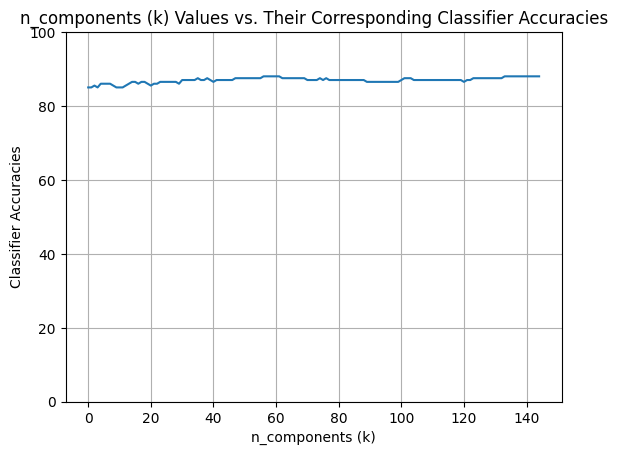

In [ ]:
# finding the classifier accuracy for each n_components (k) value between 1 and 175
accuracies = []
for k in range(30, 175):
  kpca_poly_extra = KernelPCA(kernel='poly', degree=3, n_components=k)
  kpca_poly_extra.fit(train)
  reduced_train = kpca_poly_extra.transform(train)  # I could have used fit_transform on the train set to do everything in one line of code, but I broke it up the code, like how the professor showed in class
  reduced_test = kpca_poly_extra.transform(test)
  pred = myclassifier(reduced_train, train_label, reduced_test)
  accuracy = calculate_accuracy(test_label, pred)
  accuracies.append(accuracy*100)

# plotting the n_component (k) values against their corresponding accuracy values
accuracies = np.array(accuracies)  # converting to np
plt.plot(accuracies)
plt.ylim([0,100])  # setting a limit for the values of the y axis, since we are working with percent values on that axis
plt.xlabel('n_components (k)')
plt.ylabel('Classifier Accuracies')
plt.title('n_components (k) Values vs. Their Corresponding Classifier Accuracies')
plt.grid()
plt.show()